## 실습 - Insurance Prediction

의료보험 데이터를 활용해 한 사람이 보험료를 얼마나 낼지를 예측하는 회귀 문제를 다뤄보겠습니다.데이터를 이루고 있는 column들에 대한 설명은 다음과 같습니다.

- Age: 피보험자의 나이
- Sex: 피보험자의 성별
- BMI: 피보험자의 체질량 지수 -  $weight(kg) / height(m)^2$
- Children: 피보험자의 자녀의 수
- Smoker: 흡연 여부 (yes / no)
- Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
- Charges: 보험료

In [107]:
!gdown --id 1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cdFYc-VI-1nDuSecY-H1eSC1W0OR-CR_
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 80.6MB/s]


data 준비를 위한 코드는 이번에 제공해드리겠습니다.

아래 코드를 그대로 실행하시면 됩니다.

단 지금 data를 이미 trian, test가 나누어져 있으니 이를 감안하시고 나중에 test를 또 나누지 않아도 됩니다.

스케일링 과정에서 fit과 transform을 유의해주세요

In [108]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)

    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])


    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

In [109]:
X_test

,id,age,sex,bmi,children,smoker,region
1088,1088,52,male,47.740,1,no,southeast
1157,1157,23,female,23.180,2,no,northwest
1267,1267,24,male,31.065,0,yes,northeast
506,506,22,male,31.350,1,no,northwest
659,659,57,female,28.785,4,no,northeast
...,...,...,...,...,...,...,...
1275,1275,57,male,23.700,0,no,southwest
88,88,46,female,27.740,0,no,northwest
646,646,39,male,26.220,1,no,northwest
654,654,59,female,35.200,0,no,southeast


### EDA

In [110]:
# 데이터 타입 및 데이터 개수 확인
X_train.info() # 문제지
y_train.info() # 문제지 답

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1070 non-null   int64  
 1   charges  1070 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 25.1 KB


In [111]:
# 타깃 데이터 확인
y_train

,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300
...,...,...
44,44,6079.67150
621,621,40182.24600
1152,1152,40941.28540
57,57,34303.16720


Text(0.5, 0.98, 'Charges')

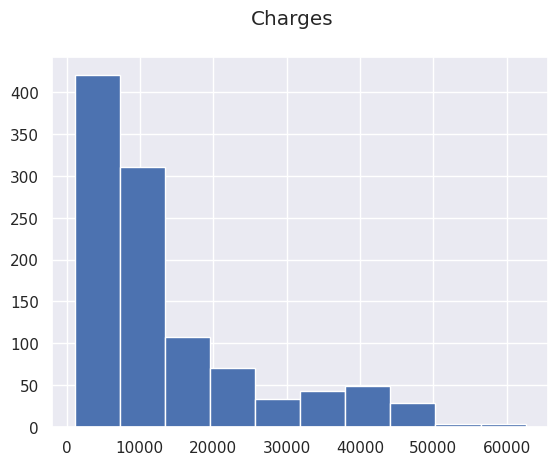

In [112]:
# 타깃 데이터 분포 확인
import matplotlib.pyplot as plt
y_train1=y_train['charges']
fig=plt.figure()
ax1=fig.add_subplot()
ax1.hist(y_train1)
fig.suptitle('Charges')

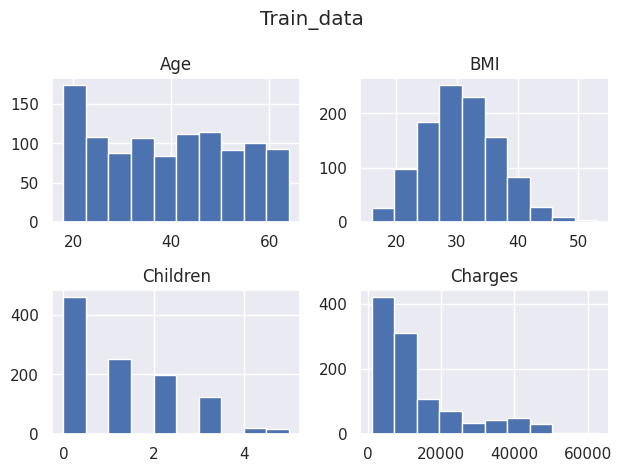

In [113]:
# 데이터 분포 확인 - 수치형
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
# 데이터 필터링
dataset1=X_train['age']
dataset2=X_train['bmi']
dataset3=X_train['children']
dataset4=y_train['charges']


#그래프 격자 만들기
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

#그래프 그리기
ax1.hist(dataset1)
ax2.hist(dataset2)
ax3.hist(dataset3)
ax4.hist(dataset4)

#각각 그래프 제목 붙이기
ax1.set_title('Age')
ax2.set_title('BMI')
ax3.set_title('Children')
ax4.set_title('Charges')

#그림판 이름 붙이기
fig.suptitle('Train_data')

#그래프 글자 겹치는 부분 해결하기
fig.tight_layout()

In [114]:
# 데이터 분포 확인 - 카테고리형 (파이차트)
print('========sex=======')
print(X_train['sex'].value_counts())
new_sex=pd.DataFrame(X_train['sex'].value_counts())
print('========smoker=======')
print(X_train['smoker'].value_counts())
new_smoker=pd.DataFrame(X_train['smoker'].value_counts())
print('========region=======')
print(X_train['region'].value_counts())
new_region=pd.DataFrame(X_train['region'].value_counts())
new_sex

========sex=======
male      551
female    519
Name: sex, dtype: int64
========smoker=======
no     845
yes    225
Name: smoker, dtype: int64
========region=======
southeast    304
northeast    266
southwest    261
northwest    239
Name: region, dtype: int64


,sex
male,551
female,519


([<matplotlib.patches.Wedge at 0x7c52f978a500>,
 [Text(-0.051655737683049645, 1.0987864600387194, 'male'),
  Text(0.051655634807235895, -1.0987864648750738, 'female')],
 [Text(-0.028175856918027077, 0.5993380691120287, '51.50%'),
  Text(0.028175800803946847, -0.5993380717500402, '48.50%')])

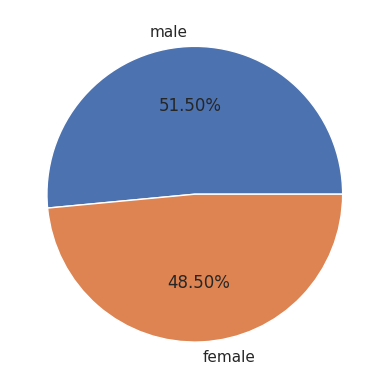

In [115]:
# 데이터 분포 확인 - 카테고리형 (파이차트)
# 데이터 필터링
plt.pie(x=list(X_train['sex'].value_counts()),labels=list(X_train['sex'].unique()),autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x7c530223b850>,
 [Text(-0.8685763612924181, 0.6749630394355108, 'no'),
  Text(0.8685763928897172, -0.6749629987745163, 'yes')],
 [Text(-0.4737689243413189, 0.36816165787391497, '78.97%'),
  Text(0.47376894157620936, -0.3681616356951906, '21.03%')])

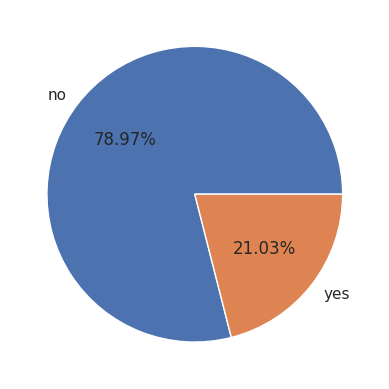

In [116]:
plt.pie(x=list(X_train['smoker'].value_counts()),labels=list(X_train['smoker'].unique()),autopct='%.2f%%')

([<matplotlib.patches.Wedge at 0x7c52f97d3430>,
 [Text(0.6901587370823247, 0.8565517600407642, 'northeast'),
  Text(-0.9228307000064723, 0.598651400337095, 'southwest'),
  Text(-0.6201602427164654, -0.9085159730867999, 'northwest'),
  Text(0.8401061372755997, -0.7100856836409755, 'southeast')],
 [Text(0.3764502202267225, 0.46721005093132584, '28.41%'),
  Text(-0.5033622000035303, 0.3265371274565972, '24.86%'),
  Text(-0.33826922329989023, -0.4955541671382544, '24.39%'),
  Text(0.4582397112412361, -0.3873194638041684, '22.34%')])

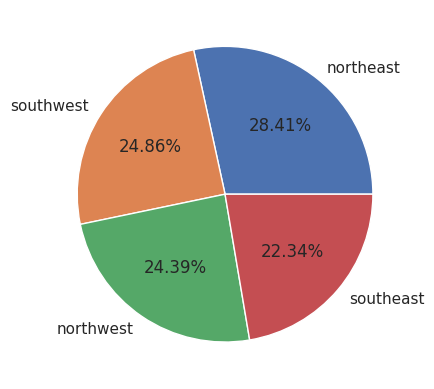

In [117]:
plt.pie(x=list(X_train['region'].value_counts()),labels=list(X_train['region'].unique()),autopct='%.2f%%')

## 데이터 상관계수 확인

<Axes: >

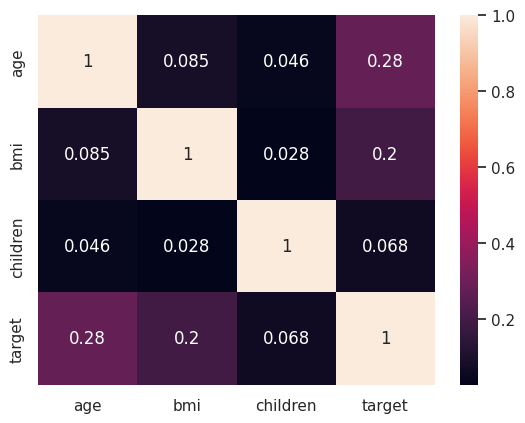

In [118]:
X_corr=X_train.drop('id',axis=1) # id 변수 제거
X_corr['target']=y_train['charges']
sns.heatmap(X_corr.corr(), annot=True)
# 변수간의 상관관계가 크지 않은 것을 확인함

### 데이터 전처리

데이터 전처리가 필요하다면 진행하세요

In [119]:
# 결측치
X_train.isna().sum() # 결측치 없음
X_test.isna().sum() # 결측치 없음
y_train.isna().sum() # 결측치 없음
y_test.isna().sum() # 결측치 없음


id         0
charges    0
dtype: int64

In [120]:
# 데이터 타입 변환
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [121]:
# 인코딩
#X_train=pd.get_dummies(X_train['sex'])
X_train = pd.get_dummies(data=X_train, columns=['sex'], dtype=float)
X_train = pd.get_dummies(data=X_train, columns=['smoker'], dtype=float)
X_train = pd.get_dummies(data=X_train, columns=['region'], dtype=float)

In [122]:
X_test = pd.get_dummies(data=X_test, columns=['sex'], dtype=float)
X_test = pd.get_dummies(data=X_test, columns=['smoker'], dtype=float)
X_test = pd.get_dummies(data=X_test, columns=['region'], dtype=float)

In [123]:
# 그 외 필요한 전처리
X_train.drop('id',axis=1,inplace=True)
X_test.drop('id',axis=1,inplace=True)
y_train.drop('id',axis=1,inplace=True)
y_test.drop('id',axis=1,inplace=True)




In [124]:
R2=[]
MAE=[]
MSE=[]
RMSE=[]

### 모델링

In [125]:
# Train-Validation Split
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split()

#수업시간에는 cross validation과 tuning을 sklearn 함수인 gridsearchCV를 사용해 편리하게 했습니다.
#이번 과제에서도 해당 함수를 사용하셔도 됩니다.
#그러나 cross validation도 train_test_split 함수를 사용해 validation dataset을 만들어 직접 하이퍼 파라미터 튜닝을 할 수 있습니다.
#한번 직접 구현해 보실 분들은 for를 사용해서 직접 해 보시는 걸 추천합니다.

## Elastic Net

In [126]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.3)
elastic.fit(X_train, y_train)
elastic

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [127]:
print("This model accuracy is {}%".format(round(elastic.score(X_test, y_test)*100,2)))

This model accuracy is 72.81%


In [128]:
# CV를 이용해 하이퍼 파라미터 튜닝 --> 모델 성능 최적화
elastic.score(X_train, y_train)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

model = ElasticNet()

parametersGrid = {
                "alpha": [0.0001, 0.01, 1, 10, 100],
                "l1_ratio": np.arange(0.0, 1.2, 0.2)}

grid_els = GridSearchCV(model, param_grid = parametersGrid, cv=3, refit = True ,  scoring='r2')

# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환

grid_els.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 10, 100],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             scoring='r2')

In [129]:
pd.DataFrame(grid_els.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'l1_ratio': 0.0}",0.748488,2,0.793918,0.712409,0.739138
1,"{'alpha': 0.0001, 'l1_ratio': 0.2}",0.748488,3,0.793923,0.712405,0.739136
2,"{'alpha': 0.0001, 'l1_ratio': 0.4}",0.748487,4,0.793928,0.712401,0.739134
3,"{'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}",0.748487,5,0.793932,0.712398,0.739132
4,"{'alpha': 0.0001, 'l1_ratio': 0.8}",0.748487,6,0.793935,0.712395,0.739131
5,"{'alpha': 0.0001, 'l1_ratio': 1.0}",0.748487,8,0.793935,0.712394,0.739131
6,"{'alpha': 0.01, 'l1_ratio': 0.0}",0.748098,14,0.790880,0.713737,0.739679
7,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.748266,13,0.791563,0.713584,0.739652
8,"{'alpha': 0.01, 'l1_ratio': 0.4}",0.748390,12,0.792211,0.713375,0.739585
9,"{'alpha': 0.01, 'l1_ratio': 0.6000000000000001}",0.748470,11,0.792824,0.713108,0.739477


In [130]:
#최적 Hyperparameters로 수정
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01, l1_ratio=0.8)
elastic.fit(X_train, y_train)
elastic

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [131]:
# 모델 성능 확인 - 다양한 성능지표(R2, RMSE, MAE)
from sklearn import metrics
y_pred = elastic.predict(X_test)
#print(plt.scatter(y_test, y_pred))


print("R2:", elastic.score(X_test,y_test))
R2.append(elastic.score(X_test,y_test))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2: 0.7390516211639369
MAE: 4114.965864387991
MSE:  36792012.67025914
RMSE:  6065.641983356679


In [132]:
print("This model accuracy is {}%".format(round(elastic.score(X_test, y_test)*100,2)))

This model accuracy is 73.91%


In [133]:
coeff_df = pd.DataFrame(elastic.coef_,X_train.columns,columns=['Coefficient'])
print(coeff_df)

                   Coefficient
age                 250.673591
bmi                 371.303412
children            551.978034
sex_female           84.855372
sex_male            -84.308739
smoker_no        -11922.112054
smoker_yes        11917.986690
region_northeast    629.664464
region_northwest    430.556326
region_southeast   -863.066670
region_southwest   -196.534686


## Ridge

In [134]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train) # - 모델링. alpha는 우리가따로 선정안하면 1로 되어 있음 및 학습
ridge.coef_.max(), ridge.coef_.min(), np.mean(ridge.coef_)

(11989.695207293866, -11989.695207281871, 106.85369817735264)

In [135]:
ridge.coef_.argmax()

6

In [136]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

model = Ridge()

parametersGrid = {"alpha": [0.0001, 0.01, 1, 10, 100]}

grid_els = GridSearchCV(model, param_grid = parametersGrid, cv=3, refit = True ,  scoring='r2')
# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환
# cv=3 한번 체크하면 잘 못된 결정을 할 수 있으니, 3번 정도 확인해서 평균을 내겠다.
# scoring = r2 r2를 기준으로 점수를 내겠다.
grid_els.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.01, 1, 10, 100]}, scoring='r2')

In [137]:
pd.DataFrame(grid_els.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.0001},0.748487,3,0.793935,0.712394,0.739131
1,{'alpha': 0.01},0.748487,2,0.793932,0.712397,0.739132
2,{'alpha': 1},0.748503,1,0.793563,0.712673,0.739272
3,{'alpha': 10},0.747637,4,0.789406,0.713888,0.739617
4,{'alpha': 100},0.691692,5,0.712558,0.665846,0.696671


In [138]:
ridge = Ridge(alpha=1).fit(X_train, y_train) # - 모델링. alpha는 우리가따로 선정안하면 1로 되어 있음 및 학습
ridge.coef_.max(), ridge.coef_.min(), np.mean(ridge.coef_)

(11958.874271071252, -11958.874271071943, 106.79626270588687)

In [139]:
ridge.score(X_train, y_train)

0.752828669014842

In [140]:
ridge.score(X_test, y_test) #

0.7389026067071858

In [141]:
y_pred = ridge.predict(X_test)
#print(plt.scatter(y_test, y_pred))


print("R2:", ridge.score(X_test,y_test))
R2.append(ridge.score(X_test,y_test))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.7389026067071858
MAE: 4111.515454474051
MSE:  36813022.73288262
RMSE:  6067.373627269267


## Laso

In [142]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso.coef_.max(), lasso.coef_.min(), np.mean(lasso.coef_)

(830.1224143704443, -23985.56396954546, -1986.295547862615)

In [143]:
model = Lasso()

parametersGrid = {"alpha": [0.0001, 0.01, 1, 10, 100]}

grid_els = GridSearchCV(model, param_grid = parametersGrid, cv=3, refit = True ,  scoring='r2')
# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환
# cv=3 한번 체크하면 잘 못된 결정을 할 수 있으니, 3번 정도 확인해서 평균을 내겠다.
# scoring = r2 r2를 기준으로 점수를 내겠다.
grid_els.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.01, 1, 10, 100]}, scoring='r2')

In [144]:
pd.DataFrame(grid_els.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'alpha': 0.0001},0.748487,2,0.793935,0.712394,0.739131
1,{'alpha': 0.01},0.748487,1,0.793935,0.712394,0.739131
2,{'alpha': 1},0.748487,3,0.793921,0.712423,0.739116
3,{'alpha': 10},0.748470,4,0.793771,0.712665,0.738974
4,{'alpha': 100},0.747190,5,0.791716,0.713467,0.736386


In [145]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
lasso.coef_.max(), lasso.coef_.min(), np.mean(lasso.coef_)

(927.2837502599801, -23986.188429721384, -1951.0702896237663)

In [146]:
lasso.score(X_train, y_train)

0.7528339112756228

In [147]:
lasso.score(X_test, y_test)

0.7387610828607734

In [148]:
y_pred = lasso.predict(X_test)
#print(plt.scatter(y_test, y_pred))

print("R2:", lasso.score(X_test,y_test))
R2.append(lasso.score(X_test,y_test))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
MAE.append( metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.7387610828607734
MAE: 4108.581536733067
MSE:  36832976.66849845
RMSE:  6069.017768016374


In [149]:
df1=pd.DataFrame({'R2':R2,'Mae':MAE,'MSE':MSE,'RMSE':RMSE},index=['Elastic','Ridge','Lasso'])

In [150]:
df1
#Elastic이 R2이 가장 높고 MSE,RMSE 값이 가장 작은 모델 -> 성능이 가장 좋은 것으로 판단해 체택

,R2,Mae,MSE,RMSE
Elastic,0.739052,4114.965864,3.679201e+07,6065.641983
Ridge,0.738903,4111.515454,3.681302e+07,6067.373627
Lasso,0.738761,4108.581537,3.683298e+07,6069.017768


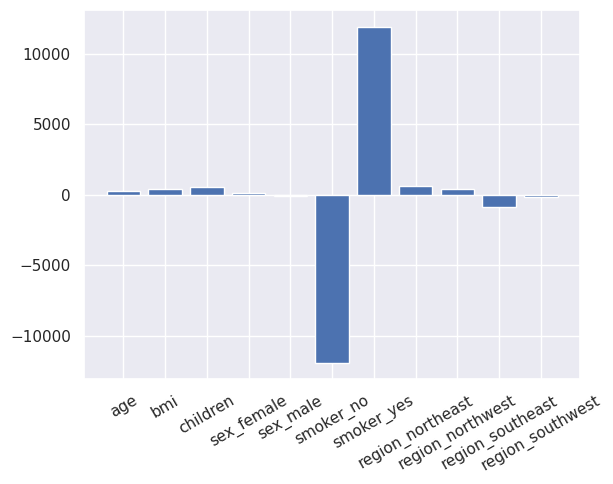

In [151]:
# 최적 모델의 weight 시각화
plt.bar(X_test.columns, elastic.coef_)
plt.xticks(rotation=30)
plt.show()

## 성능 올려보기

In [157]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# 상수항 추가
x_data2_ = sm.add_constant(X_train, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(y_train, X_train)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()
# OLS Regression 모델은 R2값이 0.753으로 매우 높음을 알 수 있다.
# 유의하지 않은 변수는 sex_female,sex_male,region_northeast,region_northwest,region_southeast
# 성별이 보험료에 유의한 영향력을 주지 않는다. 지역의 경우 region_southeast만 보험료에 유의하게 영향을 주는 것을 확인할 수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     404.0
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          1.03e-315
Time:                        18:01:31   Log-Likelihood:                -10835.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1061   BIC:                         2.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                250.7841     13.370     18.757      0.000     224.549     277.020
bmi                371.7932     31.702     11.728      0.000     309.588     433.999
children           552.8837    152.981      3.614      0.000     252.705     853.063
sex_female        -514.6248    469.513     -1.096      0.273   -1435.905     406.656
sex_male          -692.9315    474.778     -1.459      0.145   -1624.541     238.678
smoker_no         -1.26e+04    472.661    -26.651      0.000   -1.35e+04   -1.17e+04
smoker_yes        1.139e+04    507.932     22.423      0.000    1.04e+04    1.24e+04
region_northeast   332.7203    370.780      0.897      0.370    -394.825    1060.266
region_northwest   137.4280    383.771      0.358      0.720    -615.608     890.464
region_southeast -1179.8473    421.149     -2.801      0.005   -2006.227    -353.467
region_southwest  -497.8573    393.943     -1.264      0.207   -1270.853     275.138
==============================================================================
Omnibus:                      229.020   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.262
Skew:                           1.164   Prob(JB):                    8.73e-115
Kurtosis:                       5.522   Cond. No.                     4.39e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [160]:
# 유의한 변수만 남기고 돌려보기 - 크게 성능 차이는 없음
import pandas as pd
import numpy as np
import statsmodels.api as sm
# 상수항 추가
x_data2_ = sm.add_constant(X_train, has_constant = "add")
X_train=X_train.drop(['sex_female','sex_male','region_northeast','region_northwest'],axis=1)

# 회귀모델 적합
multi_model2 = sm.OLS(y_train, X_train)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     539.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):          2.28e-318
Time:                        18:04:28   Log-Likelihood:                -10835.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1063   BIC:                         2.172e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                251.0359     13.353     18.799      0.000     224.834     277.238
bmi                371.1354     31.649     11.726      0.000     309.033     433.238
children           549.3266    152.706      3.597      0.000     249.687     848.966
smoker_no        -1.295e+04   1068.731    -12.116      0.000    -1.5e+04   -1.09e+04
smoker_yes        1.103e+04   1111.766      9.919      0.000    8845.918    1.32e+04
region_southeast -1416.8751    460.346     -3.078      0.002   -2320.166    -513.584
region_southwest  -734.2207    464.637     -1.580      0.114   -1645.931     177.490
==============================================================================
Omnibus:                      229.333   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.594
Skew:                           1.166   Prob(JB):                    7.39e-115
Kurtosis:                       5.520   Cond. No.                         418.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""